# Data Structures and basic search in Python

* [Stack](#chapter1)
    * [Depth-First Search (Stack)](#section_1_1)
    * [DFS networkX](#section_1_2)
    * [Python LifoQueue (~ Stack)](#section_1_3)
* [Deque](#chapter2)
    * [Breadth-First Search (Deque)](#section_2_1)
* [Priority Queue](#chapter3)
* [Heap](#chapter4)
    * [Heapsort vs Quicksort](#section_3_1)
    * [Binary Search Trees](#section_3_2)
    * [Dijkstra Algorithm](#section_3_3)
    * [A+ Search](#section_3_4)
* [Summary](#chapter5)

<font color=blue >[Python Big O Notation] (https://wiki.python.org/moin/TimeComplexity)</font> 

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
romania_graph = {'Arad': ['Zerind', 'Sibiu', 'Timisoara'],
               'Bucharest': ['Urziceni', 'Pitesti', 'Giurgiu', 'Fagaras'],
               'Craiova': ['Drobeta', 'Rimnicu', 'Pitesti'],
               'Drobeta': ['Craiova', 'Mehadia'],
               'Eforie': ['Hirsova'],
               'Fagaras': ['Bucharest', 'Sibiu'],
               'Giurgiu': ['Bucharest'],
               'Hirsova': ['Eforie', 'Urziceni'],
               'Iasi': ['Vaslui', 'Neamt'],
               'Lugoj': ['Timisoara', 'Mehadia'],
               'Mehadia': ['Drobeta', 'Lugoj'],
               'Neamt': ['Iasi'],
               'Oradea': ['Zerind', 'Sibiu'],
               'Pitesti': ['Bucharest', 'Craiova', 'Rimnicu'],
               'Rimnicu': ['Craiova', 'Pitesti', 'Sibiu'],
               'Sibiu': ['Arad', 'Fagaras', 'Oradea', 'Rimnicu'],
               'Timisoara': ['Arad', 'Lugoj'],
               'Urziceni': ['Bucharest', 'Hirsova', 'Vaslui'],
               'Vaslui': ['Iasi', 'Urziceni'],
               'Zerind': ['Arad', 'Oradea']}

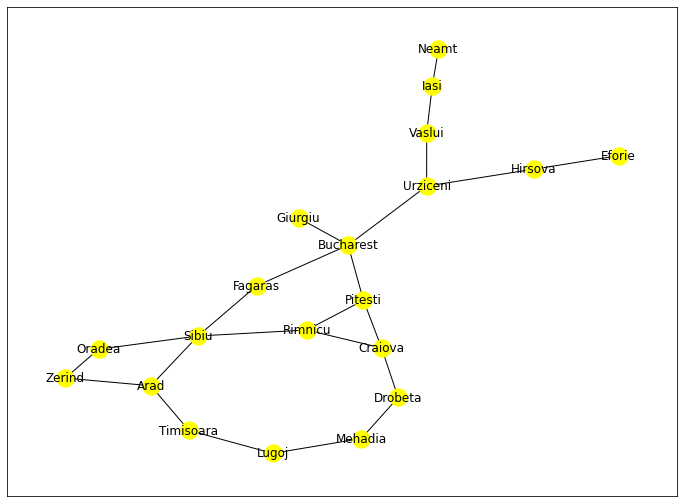

In [3]:
R = nx.from_dict_of_lists(romania_graph)
plt.figure(3,figsize=(12,9)) 
nx.draw_networkx(R, with_labels=True, node_color='yellow', node_size=300)
plt.show()

# HEAP <a class="anchor" id="chapter4"></a>

- Heap is a special tree structure in which each parent node is less than or equal to its child node. Then it is called a Min Heap
- If each parent node is greater than or equal to its child node then it is called a max heap
- useful with implementing priority queues where the queue item with higher weightage is given more priority in processing

https://www.tutorialspoint.com/python_data_structure/python_heaps.htm

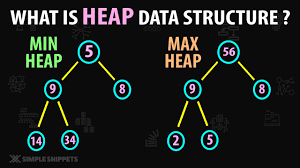

In [4]:
import heapq

H = [21,1,45,78,3,5]
# Use heapify to rearrange the elements
heapq.heapify(H)
print(H)

[1, 3, 5, 78, 21, 45]


<font color=blue >[Heap visualization] (https://www.cs.usfca.edu/~galles/visualization/Heap.html)</font> 

In [5]:
# Remove element from the heap
heapq.heappop(H)

1

In [6]:
H

[3, 21, 5, 78, 45]

In [7]:
# Replace an element
heapq.heapreplace(H,6)

3

In [8]:
H

[5, 21, 6, 78, 45]

In [9]:
# Push item on the heap, then pop and return the smallest item from the heap
heapq.heappushpop(H, 49)

5

In [10]:
H

[6, 21, 49, 78, 45]

In [11]:
heapq.nlargest(3, H)

[78, 49, 45]

Heap use cases:
 - same as priority queue
 Applications:
 - Dijkstra algorithm (shortest distance)
 - A* search algorithm
 - scheduling problems
 - extract largest/smallest element 

https://www.geeksforgeeks.org/applications-priority-queue/
 - Building heap takes O(n) time complexity, whereas building Sorted Array takes O(n * log n)
 - other operations similiar order statistics benefit (insert, delete, find min even O(1) or constant time)
 - https://docs.python.org/3/library/heapq.html

## Heapsort vs Quicksort <a class="anchor" id="section_3_1"></a>

In [12]:
def heapsort(iterable):
    h = []
    for value in iterable:
         heapq.heappush(h, value)
    return [heapq.heappop(h) for i in range(len(h))]
heapsort([1, 13, 5, 70, 9, 2, 4, 46, 8, 110])

[1, 2, 4, 5, 8, 9, 13, 46, 70, 110]

- https://stackabuse.com/quicksort-in-python/ - divide and conquer
- <font color=red >heapsort worst case (O(n*logn)) much better than quicksort worst case (O(n * n))</font> 
- https://stackabuse.com/heap-sort-in-python/

In [13]:
import random
import numpy as np
import time
import pandas as pd

In [14]:
numbers = [random.randint(1,1000) for x in range(100000)]

In [15]:
%%time
numbers_np=np.array(numbers)
indices=numbers_np.argsort()[-10:]
numbers_np[indices]

Wall time: 16.6 ms


array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000])

In [16]:
%%time
heapq.nlargest(10,numbers)

Wall time: 5.03 ms


[1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]

In [17]:
time_dict={}
algo=['quicksort', 'mergesort', 'heapsort']
for i in algo:
    start = time.time()
    np.sort(numbers, kind=i)[:10]    
    stop = time.time()
    duration = stop-start
    time_dict[i]= duration
time_pd=pd.DataFrame(time_dict, index=['time'])
print(time_pd)

      quicksort  mergesort  heapsort
time   0.018001    0.01403  0.019998


- https://numpy.org/doc/stable/reference/generated/numpy.sort.html
- Merge Sort is another Divide and Conquer algorithm
- https://stackoverflow.com/questions/10337533/a-fast-way-to-find-the-largest-n-elements-in-an-numpy-array

# Binary Search Trees <a class="anchor" id="section_3_2"></a>

- The left subtree of a node contains only nodes with keys lesser than the node’s key
- The right subtree of a node contains only nodes with keys greater than the node’s key
- The left and right subtree each must also be a binary search tree
- There must be no duplicate nodes

Sample implementations:

- https://blog.boot.dev/computer-science/binary-search-tree-in-python/
- https://www.tutorialspoint.com/python_data_structure/python_binary_search_tree.htm (search)

Performance:  
- insert,  search, delete: average O(logn), worst case (O(n)) 
- balanced binary search tree (BST) worst case: O(n)
- BST = height between bottom leaves not differ by more than 1    

What is difference between binary heap and binary search tree?

- Duplication in binary heaps is allowed because nodes <= root
- heaps are complete BST (except for last level all levels are filled)
- heaps can be created in linear time O(n) while the BST takes O (N * log ( N ) ) to build

https://www.codingninjas.com/codestudio/library/why-binary-heap-is-better-than-binary-search-tree-bst-for-priority-queues

# Dijkstra Algorithm  <a class="anchor" id="section_3_3"></a>

https://www.youtube.com/watch?v=GmU7SimFkpU

- weighted edges ~ cost function

- start at vertex $A$ in a graph and traverse an efficient path (as measured by summing edge weights) to terminate at some different vertex $B$

Process:

1. Create *unvisited set* of all nodes

2. Set distance from $A$ to $0$ for the initial/current node and to $+\infty$ for all other nodes.
<a id="dijkstra-3"></a>

3. For the current node, calculate all distances from $A$ to unvisited neighbours; compare, select smallest distance (Relaxation)

4. Remove all considered nodes from unvisited set (don't check these again) 

5. Set node with (new) smallest tentative distance as "current node", go back to step 3

(from [Wikipedia Commons](https://commons.wikimedia.org/wiki/Main_Page)) 

<center>
<img src = "https://upload.wikimedia.org/wikipedia/commons/2/23/Dijkstras_progress_animation.gif" />
    </center>

- another explanation: https://www.geeksforgeeks.org/dijkstras-shortest-path-algorithm-greedy-algo-7/

In [18]:
def relax_dijkstra(G, start, neighbor, D, P):
    '''
    This function updates the distance & predecessor dictionaries
    D & P by comparing their putative distances to the start vertex.
    ------
    G: Graph as dict of dicts
    start: start vertex
    neighbor: neighbor vertex
    D: dict of dicts keeping track of distances
    P: predecessor dictionary to track shortest path trees
    '''
    # Convenient shorthand for infinity
    inf = float('inf')
    # Shortcut estimate
    d = D.get(start, inf) + G[start][neighbor]
    print("d:",d)
    print("Start:",start)
    # Compare shortcut to existing distance
    if d < D.get(neighbor, inf):
        # Update D and P accordingly
        D[neighbor], P[neighbor] = d, start
        print("D:",D,"P:", P)
        print("**----------------------------------------------**")
        return True

In [20]:
def setup_dijkstra(start):
    '''Initialize data structures for Dijkstra's algorithm
    INPUT:
      start: label of initial vertex
    OUTPUT:
      D: Dict of distances: initialize with start->0
      P: Dict for predecessors (traversal tree, initially empty)
      Q: Priority queue (list) of tuples of form (distance, vertex)
         Initialize with tuple (0, start)
      S: Set for visited vertices (initially empty)
    '''
    D={start:0}
    P={}
    Q=[(0,start)]
    S=set()
    return D, P, Q, S

In [21]:
def dijkstra(graph, start):
    '''
    This function implements Dijkstra's algorithm on a graph,
    determining shortest distances from start to all vertices
    in the graph.
    INPUT:
    graph: dict of dicts to represent weighted graph
    start: starting vertex
    OUTPUT:
    D : dict of distances of each vertex to start
    P : dict of predecessors (for paths back to start) 
    Example:
    G = {'a': {'b': 3, 'd': 1},
         'b': {'a': 3, 'c': 2},
         'c': {'b': 2, 'f': 5},
         'd': {'a': 1, 'e': 8, 'f': 12},
         'e': {'d': 8, 'f': 4},
         'f': {'c': 5, 'd': 12, 'e': 4}}
    dijkstra(G, 'a') ====> (D, P) where
      ({'a': 0, 'b': 3, 'c': 5, 'd': 1, 'e': 9, 'f': 10},
       {'b': 'a', 'c': 'b', 'd': 'a', 'e': 'd', 'f': 'c'})
    '''
    D, P, Q, S = setup_dijkstra(start)
    while Q:                              # Unprocessed nodes?
        _, u = heapq.heappop(Q)                   # Get closest node
        if u in S: continue                 # If visited skip
        S.add(u)                            # Visit otherwise
        for v in graph[u]:                  # Examine neighbors
            relax_dijkstra(graph, u, v, D, P) # Relax edges
      ### INSERT MISSING LINE HERE
            heapq.heappush(Q,(D[v],v))
    return D,  P


In [25]:
graph_dij = {'a': {'b': 3, 'd': 1},
     'b': {'a': 3, 'c': 2},
     'c': {'b': 2, 'f': 5},
     'd': {'a': 1, 'e': 8, 'f': 12},
     'e': {'d': 8, 'f': 4},
     'f': {'c': 5, 'd': 12, 'e': 4}}

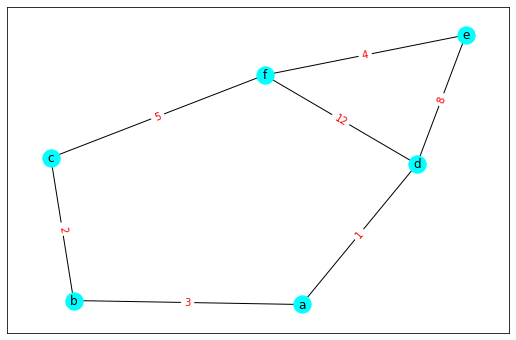

In [22]:
# Dij = nx.from_dict_of_lists(graph_dij)
edges = [['a', 'b'],['a','d'], ['b', 'c'],['c','f'], ['d', 'a'],['d','e'],['d','f'],['e','f'],['f','c']]
Dij = nx.Graph()
Dij.add_edges_from(edges)
pos = nx.spring_layout(Dij)
plt.figure(3,figsize=(9,6)) 
nx.draw_networkx(Dij, pos, with_labels=True, node_color='cyan', node_size=300)
nx.draw_networkx_edge_labels(
    Dij, pos,
    edge_labels={('a','b'):3,('a','d'):1,('c','b'):2,('c','f'):5,('e','d'):8,('e','f'):4,('f','c'):5,('d','f'):12},
    font_color='red')
plt.show()

In [26]:
dijkstra(graph_dij, 'a')
#d Shortcut estimate
#D: dict of dicts keeping track of distances
#P: predecessor dictionary to track shortest path trees

d: 3
Start: a
D: {'a': 0, 'b': 3} P: {'b': 'a'}
**----------------------------------------------**
d: 1
Start: a
D: {'a': 0, 'b': 3, 'd': 1} P: {'b': 'a', 'd': 'a'}
**----------------------------------------------**
d: 2
Start: d
d: 9
Start: d
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9} P: {'b': 'a', 'd': 'a', 'e': 'd'}
**----------------------------------------------**
d: 13
Start: d
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 13} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'd'}
**----------------------------------------------**
d: 6
Start: b
d: 5
Start: b
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 13, 'c': 5} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'd', 'c': 'b'}
**----------------------------------------------**
d: 7
Start: c
d: 10
Start: c
D: {'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 10, 'c': 5} P: {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'c', 'c': 'b'}
**----------------------------------------------**
d: 17
Start: e
d: 13
Start: e
d: 15
Start: f
d: 22
Start: f
d: 14
Start: f


({'a': 0, 'b': 3, 'd': 1, 'e': 9, 'f': 10, 'c': 5},
 {'b': 'a', 'd': 'a', 'e': 'd', 'f': 'c', 'c': 'b'})

In [32]:
print(nx.shortest_path(R, source='Urziceni', target='Mehadia'))

['Urziceni', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia']


# A* search <a class="anchor" id="section_3_4"></a>

- *heuristic function* $h$: 
    - helps in choosing the node progression 
    - eliminates some of the work that Dijkstra's algorithm requires

-  focus on the goal state of the traversal and trim the amount of routes considered

<center>
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/5/5d/Astar_progress_animation.gif'/>
</center>

In [28]:
def a_star(G, s, t, h):
    '''
    G: graph
    s: start vertex
    t: terminal vertex
    h: heuristic function
    '''
    inf = float('inf')
    P, Q = {}, [(h(s), None, s)]
    while Q:
        d, p, u = heappop(Q)
        if u in P: continue
        P[u] = p
        if u == t: return d - h(t), P
        for v in G[u]:
            w = G[u][v] - h(u) + h(v) #incorporating the heuristic
            heappush(Q, (d + w, u, v))
    return inf, None

- heuristic function of the form  ℎ(𝑡)=0  yields Djisktra's algorithm.
- to implement the a_star above would involve additional information about the orientation of points in our simple graph
  or the introduction of a coordinate system to allow easy use of the metric.

In [33]:
print(nx.astar_path(R,'Urziceni','Mehadia'))

['Urziceni', 'Bucharest', 'Pitesti', 'Craiova', 'Drobeta', 'Mehadia']


In [37]:
# print(nx.astar_path_length(R,'Arad','Bucharest'))

Constructing a Distance Heuristic for A*

Your task here is to apply A* to the graph `G3` describing the Sioux Falls transportation nextwork data. You can use the `networkx` implementation, but you'll also provide a heuristic function `sioux_dist`.
+ The function `sioux_dist` will accept two vertex labels from the `Graph` object `G3` as input.
+ Individual vertices can be indexed from `G3.node` with an appropriate label; for each vertex `a`, you can access a dict `G3.node[a]` with a single key `pos` whose value is a 2-tuple with the Cartesian coordinates of the node.
+ The distance computed will be the usual Euclidean distance, i.e.,
  $$ \sqrt{\left(a_1-b_1\right)^2 + \left(a_2-b_2\right)^2} $$
  being the distance between two points $a=(a_1,a_2)$ and $b=(b_1,b_2)$.

In [38]:
G3 = nx.DiGraph() # a *directed* graph
with open("./SiouxFalls_flow.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        l = line.split()
        fromnode = int(l[0])
        to = int(l[1])
        volume = float(l[2])
        cost = int(float(l[3]))
        G3.add_edge(fromnode, to, weight = cost)
        line = f.readline()

In [39]:
with open("./SiouxFalls_node.txt", "r") as f:
    line = f.readline()
    line = f.readline()
    while len(line):
        line = line.strip(';')
        l = line.split()
        node = int(l[0])
        pos1 = float(l[1])/10000
        pos2 = float(l[2])/10000
        G3.add_node(node, pos=(pos1,pos2))
        line = f.readline()

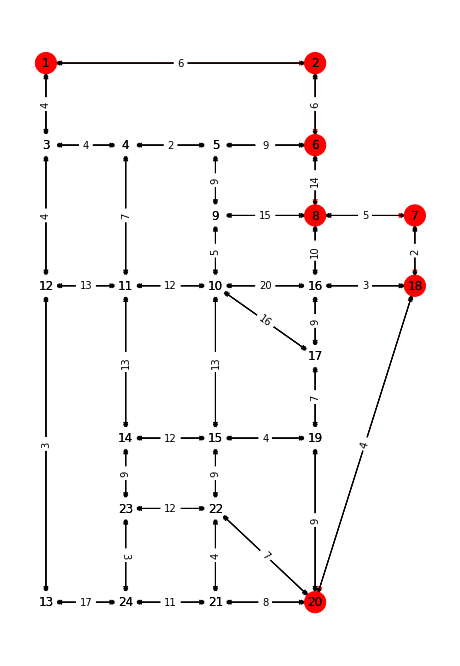

In [40]:
# CREATE PLOT OF NETWORK
plt.figure(figsize=(8,12))
# The positions of each node are stored in a dictionary
node_pos=nx.get_node_attributes(G3,'pos')
# The edge weights of each arcs are stored in a dictionary
arc_weight=nx.get_edge_attributes(G3,'weight')
# Determine the shortest path
sp = nx.dijkstra_path(G3,source = 1, target = 20)
# Create a list of arcs in the shortest path using the zip command and store it in red edges
red_edges = list(zip(sp,sp[1:]))
# If the node is in the shortest path, set it to red, else set it to white color
node_col = ['white' if not node in sp else 'red' for node in G3.nodes()]
# If the edge is in the shortest path set it to red, else set it to white color
edge_col = ['black' if not edge in red_edges else 'red' for edge in G3.edges()]
# Draw the nodes
nx.draw_networkx(G3, node_pos,node_color= node_col, node_size=450,edge_color=edge_col)
# Draw the node labels
nx.draw_networkx_labels(G3, node_pos)#,node_color= node_col)
# Draw the edges
nx.draw_networkx_edges(G3, node_pos)#,edge_color= edge_col)
# Draw the edge labels
nx.draw_networkx_edge_labels(G3, node_pos, edge_labels=arc_weight)#,edge_color= edge_col)
# Remove the axis
plt.axis('off');

In [46]:
def euclidean_dist(a, b):
    '''
    Compute the euclidean distance between nodes a & b in graph G3
    '''
    
    (a1,a2)=G3.nodes[a]['pos']
    (b1,b2)=G3.nodes[b]['pos']
    return np.sqrt((a1-b1)**2+(a2-b2)**2)

def manhattan_dist(a, b):
    '''
    This function takes in two tuples of the form (x,y)
    and computes the manhattan distance between the two.
    '''
    a=G3.nodes[a]['pos']
    b=G3.nodes[b]['pos']
    return abs(a[0]-b[0])+abs(a[1]-b[1])

print('Using euclidean_distance, A* determines the path\n{}\nfrom node 1 to node 20.'
       .format(nx.astar_path(G3, 1, 20, euclidean_dist)))

print('Using manhattan_distance, A* determines the path\n{}\nfrom node 1 to node 20.'
       .format(nx.astar_path(G3, 1, 20, manhattan_dist)))

print('Using default distance, A* determines the path\n{}\nfrom node 1 to node 20.'
       .format(nx.astar_path(G3, 1, 20)))

Using euclidean_distance, A* determines the path
[1, 3, 12, 13, 24, 21, 20]
from node 1 to node 20.
Using manhattan_distance, A* determines the path
[1, 2, 6, 8, 16, 17, 19, 20]
from node 1 to node 20.
Using default distance, A* determines the path
[1, 2, 6, 8, 7, 18, 20]
from node 1 to node 20.


https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.astar.astar_path.html

## Greedy vs Non Greedy Algorithm

- downside of greedy: making decisions too early, not examine whole dataset
- other more advanced algorithms 
- analogy: randomness simimliar to SGD and Gradient Descent in machine leanring : Faster Learning: Accordingly, stochastic   
  gradient descent may result in much faster learning because an update is performed after each data instance is processed.
  But the convergence path of SGD is noisier than that of original gradient descent. This is because in each step it is not 
  calculating the actual gradient but an approximation. So we see a lot of fluctuations in the cost. But still, it is a much  
  better choice.
- analogy: ensemble methods:  The mechanism for improved performance with ensembles is often the reduction in the variance component of prediction errors made by the contributing models. 

# Summary <a class="anchor" id="chapter5"></a>

- what heaps and binary search trees are
- heapsort vs others; performance
- where data structures are used (applications: Dijkstra, A+)
- how this is done in python